In [61]:
#Necessary to install keras
!pip install tensorflow

    100% |████████████████████████████████| 92.5MB 49kB/s eta 0:00:011    13% |████▍                           | 12.6MB 4.3MB/s eta 0:00:19    14% |████▌                           | 13.0MB 3.0MB/s eta 0:00:27    67% |█████████████████████▋          | 62.4MB 2.3MB/s eta 0:00:13
    100% |████████████████████████████████| 3.2MB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 368kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 3.5MB/s ta 0:00:01
  Found existing installation: tensorboard 1.8.0
    Uninstalling tensorboard-1.8.0:
      Successfully uninstalled tensorboard-1.8.0


In [49]:
#Keras :)
!pip install keras

    100% |████████████████████████████████| 317kB 1.3MB/s ta 0:00:01


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

In [2]:
#Read the data using the Unnamed (probably id) as index
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')

labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 
          'Sharing', 'Student_Type', 'Use']

numeric = ['FTE', 'Total']

categoric = [ 'Facility_or_Department', 'Function_Description', 
            'Fund_Description', 'Job_Title_Description', 'Location_Description', 
            'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 
            'Sub_Object_Description', 
            'Text_1', 'Text_2', 'Text_3', 'Text_4']

## Data cleaning

### Part 1: numeric data
First of all, the numeric columns `FTE` and `Total` must be cleaned. The outliers will be treated as `NaN` values and imputation will be applied to the missing data.

In [3]:
# Remove inconsistent data
training[training['FTE'] < 0] = np.nan
training[training['Total'] < 0] = np.nan

In [4]:
training['FTE'].describe()

count    125849.000000
mean          0.427436
std           0.573810
min           0.000000
25%           0.001078
50%           0.133337
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

In [5]:
training[training['FTE'] < 0]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1


In [6]:
training['Total'].describe()

count    3.518450e+05
mean     1.696423e+04
std      3.402292e+05
min      0.000000e+00
25%      1.384847e+02
50%      6.696800e+02
75%      4.999610e+03
max      1.297000e+08
Name: Total, dtype: float64

In [10]:
training[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      125849 non-null float64
Total    351845 non-null float64
dtypes: float64(2)
memory usage: 9.2 MB


In [8]:
400277 - 125849

274428

In [12]:
400277 - 351845

48432

### Part 2: Categoric data

The strings must be normalized: symbols removed, all letters to lower case. Then, they can be transformed to numeric data.

In [13]:
for category in categoric:
    training[category] = training[category].str.lower()

In [14]:
#Check if the unique values decrease
training[categoric].nunique(dropna=False)

Facility_or_Department     176
Function_Description       655
Fund_Description           141
Job_Title_Description     3455
Location_Description       352
Object_Description         570
Position_Extra             580
Program_Description        418
SubFund_Description        267
Sub_Object_Description     159
Text_1                    1389
Text_2                     279
Text_3                      35
Text_4                     240
dtype: int64

In [ ]:
#Convert columns
training[categoric] = training[categoric].apply(lambda x: x.astype('object'), axis = 0)

In [16]:
training[categoric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 14 columns):
Facility_or_Department    53186 non-null object
Function_Description      298676 non-null object
Fund_Description          179157 non-null object
Job_Title_Description     272317 non-null object
Location_Description      155504 non-null object
Object_Description        332143 non-null object
Position_Extra            244180 non-null object
Program_Description       280943 non-null object
SubFund_Description       263731 non-null object
Sub_Object_Description    70748 non-null object
Text_1                    251891 non-null object
Text_2                    87431 non-null object
Text_3                    108613 non-null object
Text_4                    53384 non-null object
dtypes: object(14)
memory usage: 45.8+ MB


Before removing symbols, let's take a peek on some values and so we can detect the diferrences later


In [17]:
some_functions = training['Function_Description'].value_counts(normalize=True) > 0.05
some_functions.head(6)

non-project                        True
instruction                        True
unalloc budgets/schools            True
basic (fefp k-12)                 False
employee retirement               False
ela e-teaching sheltered eng      False
Name: Function_Description, dtype: bool

In [18]:
# Remove symbols
'''for category in categoric:
    training[category] = training[category].str.replace(r"[&/\)('\"-.,]","")'''
vec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2))

In [19]:
training['Function_Description'].value_counts(normalize=True).head(6)

non-project                       0.191686
instruction                       0.128882
unalloc budgets/schools           0.055458
basic (fefp k-12)                 0.044473
employee retirement               0.043723
ela e-teaching sheltered eng      0.021093
Name: Function_Description, dtype: float64

In [20]:
training[categoric] = training[categoric].fillna("")

In [21]:
training['Function_Description'].isnull().sum()

0

In [22]:
# Join all text items in a row that have a space in between
text_data = training[categoric].apply(lambda x: " ".join(x), axis = 1)

In [31]:
text_data

134338      general fund teacher-elementary    kindergar...
206341     rgn  gob  (blank)  contractor services undesi...
326408      general purpose school tcher 2nd grade  pers...
364634     unalloc budgets/schools  teacher, short term ...
47683      non-project  teacher, secondary (high)   teac...
229958                                                     
417668      local fund   educational supplies and materi...
126378     non-project  sub manager, food service  distr...
275539     ela s - teaching spanish only  teacher, eleme...
85262      unalloc budgets/schools  teacher,retrd shrt t...
304569                                                     
330504     instruction general fund   supplies  primary ...
84272     position control pools  general purpose school...
64760                                                      
21870      basic (fefp k-12)              conversion cha...
18698     all campus payroll instruction general operati...
169454     basic (fefp k-12)            

In [23]:
hec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", norm=None, binary=False,
                                                     ngram_range=(1,2))
hashed_text = hec.fit_transform(text_data)

In [35]:
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221742 entries, 0 to 5221741
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 39.8 MB
None


In [37]:
hashed_df

,0
0,0.377964
1,0.755929
2,0.377964
3,0.377964
4,0.182574
5,-0.182574
6,-0.182574
7,-0.365148
8,0.182574
9,0.182574


## Frequency of labels

In [24]:
training[labels].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 9 columns):
Function            356393 non-null object
Object_Type         356393 non-null object
Operating_Status    356393 non-null object
Position_Type       356393 non-null object
Pre_K               356393 non-null object
Reporting           356393 non-null object
Sharing             356393 non-null object
Student_Type        356393 non-null object
Use                 356393 non-null object
dtypes: object(9)
memory usage: 30.5+ MB


In [98]:
training.groupby('Object_Type')['Total'].mean()

Object_Type
Base Salary/Compensation       24145.844441
Benefits                         865.616621
Contracted Services            38163.380901
Equipment & Equipment Lease    11257.335020
NO_LABEL                       58545.010979
Other Compensation/Stipend      1604.962876
Other Non-Compensation         10646.892470
Rent/Utilities                 46610.910607
Substitute Compensation         1090.501980
Supplies/Materials              7745.381168
Travel & Conferences            1659.440688
Name: Total, dtype: float64

In [112]:
training['Total'].mean()

16964.228335602154

In [123]:
def impute_func_total(data):
    if(pd.isnull(data['Object_Type'])):
        return 16964
    if(pd.isnull(data['Total'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 24146
        if(data['Object_Type'] == 'Benefits'):
            return 38163
        if(data['Object_Type'] == 'Contracted Services'):
            return 24146
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 11257
        if(data['Object_Type'] == 'NO_LABEL'):
            return 58545
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 1605
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 10646
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 46611
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 1090
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 7745
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 1659
    else:
        return data['Total']

In [125]:
training['Total'] = training.apply(impute_func_total, axis = 1)

In [1]:
training.groupby('Object_Type')['FTE'].mean()

NameError: name 'training' is not defined

In [128]:
training['FTE'].mean()

0.42743640942129435

In [132]:
def impute_func_FTE(data):
    if(pd.isnull(data['Object_Type'])):
        return 0.42
    if(pd.isnull(data['FTE'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 0.5
        if(data['Object_Type'] == 'Benefits'):
            return 0.0
        if(data['Object_Type'] == 'Contracted Services'):
            return 0.0
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 0.0
        if(data['Object_Type'] == 'NO_LABEL'):
            return 0.75
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 0.000107
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 0.0
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 0.0
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 0.000059
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 0.0
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 0.0
    else:
        return data['FTE']

In [133]:
training['FTE'] = training.apply(impute_func_FTE, axis = 1)

In [143]:
mask = training['FTE'] > 1
df_ToAtt = training[mask]

training.loc[mask, 'FTE'] = df_ToAtt['FTE'].div(100)

In [146]:
training.describe()

,FTE,Total
count,400277.000000,4.002770e+05
mean,0.249187,1.720464e+04
std,0.351219,3.189983e+05
min,0.000000,0.000000e+00
25%,0.000000,1.747800e+02
50%,0.000107,1.046583e+03
75%,0.420000,1.696400e+04
max,1.000000,1.297000e+08


In [134]:
training[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      400277 non-null float64
Total    400277 non-null float64
dtypes: float64(2)
memory usage: 19.2 MB


In [95]:
CountStatus = pd.value_counts(training['Object_Type'].values, sort=True)

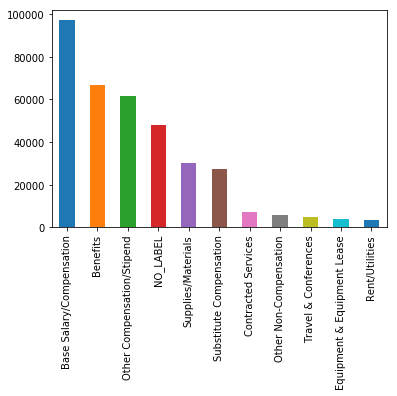

In [96]:
CountStatus.plot.bar()

## Intro to Neural Network

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [147]:
numeric_data = training[numeric]

In [136]:
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [137]:
#Simple imputations
#numeric_data[['FTE']] = imp.fit(numeric_data[['FTE']]).transform(numeric_data[['FTE']])

In [138]:
#numeric_data[['Total']] = imp.fit(numeric_data[['Total']]).transform(numeric_data[['Total']])

In [55]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      400277 non-null float64
Total    400277 non-null float64
dtypes: float64(2)
memory usage: 9.2 MB


In [56]:
numeric_data.describe()

,FTE,Total
count,400277.000000,4.002770e+05
mean,0.427436,1.696423e+04
std,0.321745,3.189825e+05
min,0.000000,0.000000e+00
25%,0.427436,1.747800e+02
50%,0.427436,1.046583e+03
75%,0.427436,1.696423e+04
max,46.800000,1.297000e+08


In [148]:
numeric_data.describe()

,FTE,Total
count,400277.000000,4.002770e+05
mean,0.249187,1.720464e+04
std,0.351219,3.189983e+05
min,0.000000,0.000000e+00
25%,0.000000,1.747800e+02
50%,0.000107,1.046583e+03
75%,0.420000,1.696400e+04
max,1.000000,1.297000e+08


In [149]:
df_dummies = pd.get_dummies(training['Object_Type'])

In [150]:
df_dummies.head()

,Base Salary/Compensation,Benefits,Contracted Services,Equipment & Equipment Lease,NO_LABEL,Other Compensation/Stipend,Other Non-Compensation,Rent/Utilities,Substitute Compensation,Supplies/Materials,Travel & Conferences
134338,0,0,0,0,1,0,0,0,0,0,0
206341,0,0,0,0,1,0,0,0,0,0,0
326408,1,0,0,0,0,0,0,0,0,0,0
364634,0,1,0,0,0,0,0,0,0,0,0
47683,0,0,0,0,0,0,0,0,1,0,0


In [151]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 11 columns):
Base Salary/Compensation       400277 non-null uint8
Benefits                       400277 non-null uint8
Contracted Services            400277 non-null uint8
Equipment & Equipment Lease    400277 non-null uint8
NO_LABEL                       400277 non-null uint8
Other Compensation/Stipend     400277 non-null uint8
Other Non-Compensation         400277 non-null uint8
Rent/Utilities                 400277 non-null uint8
Substitute Compensation        400277 non-null uint8
Supplies/Materials             400277 non-null uint8
Travel & Conferences           400277 non-null uint8
dtypes: uint8(11)
memory usage: 17.3 MB


In [152]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data,
                                                    df_dummies,
                                                    test_size=0.2, 
                                                    random_state=42)

In [61]:
X_train

,FTE,Total
444691,0.427436,218.450000
250816,0.427436,3126.332668
393405,0.427436,674.710000
299533,0.427436,286.688429
357445,0.427436,221.843840
67965,0.427436,16964.228336
327481,0.427436,775.291920
81419,0.427436,16964.228336
397760,1.000000,18309.289661
426528,0.427436,525.670000


In [153]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [154]:
# Adding the input layer and the first hidden, the hidden layer number is (11 + 2)/2
mlp = MLPClassifier(hidden_layer_sizes=(13,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [155]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.08068273
Iteration 2, loss = 1.97578412
Iteration 3, loss = 1.92443294
Iteration 4, loss = 1.88862667
Iteration 5, loss = 1.90631699
Iteration 6, loss = 1.85723219
Iteration 7, loss = 1.82544104
Iteration 8, loss = 1.81252486
Iteration 9, loss = 1.79509546
Iteration 10, loss = 1.81800031
Iteration 11, loss = 1.79072333
Iteration 12, loss = 1.79060406
Iteration 13, loss = 1.78559994
Iteration 14, loss = 1.78941146
Iteration 15, loss = 1.79177222
Iteration 16, loss = 1.78468757
Iteration 17, loss = 1.76821562
Iteration 18, loss = 1.76972901
Iteration 19, loss = 1.76487331
Iteration 20, loss = 1.77547972
Iteration 21, loss = 1.75988323
Iteration 22, loss = 1.74873678
Iteration 23, loss = 1.75812330
Iteration 24, loss = 1.74984782
Iteration 25, loss = 1.74646009
Iteration 26, loss = 1.74531469
Iteration 27, loss = 1.75402678
Iteration 28, loss = 1.74738444
Iteration 29, loss = 1.74235675
Iteration 30, loss = 1.74920819
Iteration 31, loss = 1.74462055
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [156]:
#Making predictions and evaluating the model

# Predicting the Test set results
y_pred = mlp.predict(X_test)

In [157]:
y_test_np = y_test.values
y_test_np.shape

(80056, 11)

In [94]:
y_pred.shape

(80056, 11)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_np, y_pred, normalize=True)

0.24505346257619667

In [158]:
accuracy_score(y_test_np, y_pred, normalize=True)

0.3207629659238533